In [1]:
filenames = [
    'baseline_sw_NAT.txt', 
    'NAT_translate.txt', 
    'NAT_no_translate.txt',
    'raw_eth10g_without_NAT.txt',
]

exp_names = [
    'SW NAT',
    'HW NAT',
    'HW NAT w/o translate',
    'w/o NAT',
]

packet_sizes = [
    0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000
]

connections = [
    1,4,16,64,256,1024
]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# each file has 20 lines, 1 to 7 belongs to the first flow, 9 to 20 belongs to the second flow
# each line has 4 strings separated by space, the third string is the throughput

connection_throughput = dict()
packet_size_throughput = dict()

for filename in filenames:
    connection_throughput[filename] = []
    packet_size_throughput[filename] = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        for line in lines[1:7]:
            connection_throughput[filename].append(float(line.split()[2]))
        connection_throughput[filename] = np.array(connection_throughput[filename])
        for line in lines[9:20]:
            packet_size_throughput[filename].append(float(line.split()[2]))
        packet_size_throughput[filename] = np.array(packet_size_throughput[filename])

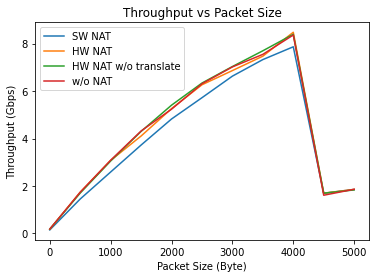

In [4]:
# plot packet size throughput, high resolution
fig, ax = plt.subplots()
for filename in filenames:
    ax.plot(packet_sizes, packet_size_throughput[filename], label=exp_names[filenames.index(filename)])
ax.set_xlabel('Packet Size (Byte)')
ax.set_ylabel('Throughput (Gbps)')
ax.set_title('Throughput vs Packet Size')
ax.legend()
plt.savefig('packet_size_throughput.pdf')

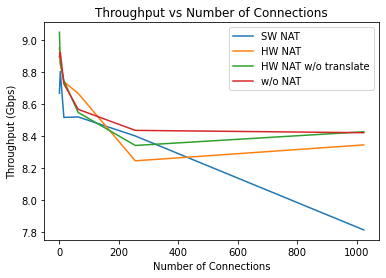

In [5]:
# plot connection throughput
fig, ax = plt.subplots()
for filename in filenames:
    ax.plot(connections, connection_throughput[filename], label=exp_names[filenames.index(filename)])
ax.set_xlabel('Number of Connections')
ax.set_ylabel('Throughput (Gbps)')
ax.set_title('Throughput vs Number of Connections')
ax.legend()
plt.savefig('connection_throughput.pdf')